In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import time

In [2]:
X_train = pd.read_csv('../2_INPUT_DATA/3_SPLIT/X_train.csv')
Y_train = pd.read_csv('../2_INPUT_DATA/3_SPLIT/Y_train.csv')
X_test = pd.read_csv('../2_INPUT_DATA/3_SPLIT/X_test.csv')
Y_test = pd.read_csv('../2_INPUT_DATA/3_SPLIT/Y_test.csv')
ids_test = pd.read_csv('../2_INPUT_DATA/3_SPLIT/ids_test.csv')
feature_names = pd.read_csv('../2_INPUT_DATA/2_FEATURE_PROCESSED/feature_names.csv')

In [4]:
X_train.columns = feature_names['0'].tolist()

In [5]:
X_train['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
246003     8083
246004    20782
246005    11387
246006    17446
246007    15592
Name: DAYS_BIRTH, Length: 246008, dtype: int64

In [8]:
Y_train

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
246003,0
246004,0
246005,0
246006,0


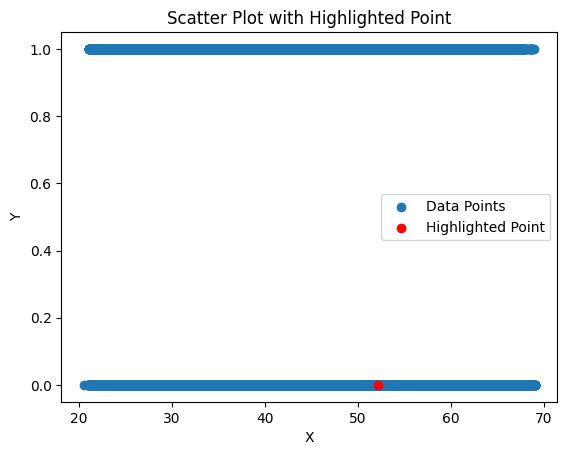

In [13]:
import matplotlib.pyplot as plt
# Plotting
fig, ax = plt.subplots()
ax.scatter(X_train['DAYS_BIRTH']/365, Y_train, label='Data Points')

# Highlight one specific point (e.g., the point at index 2)
highlight_index = 2
highlight_x = X_train.loc[highlight_index, 'DAYS_BIRTH']/365
highlight_y = Y_train.loc[highlight_index, 'TARGET']
ax.scatter(highlight_x, highlight_y, color='red', label='Highlighted Point')

# Customize plot
ax.set_xlabel('AGE in years')
ax.set_ylabel('Y')
ax.set_title('Scatter Plot with Highlighted Point')
ax.legend()

# Display plot using streamlit
plt.show(fig)

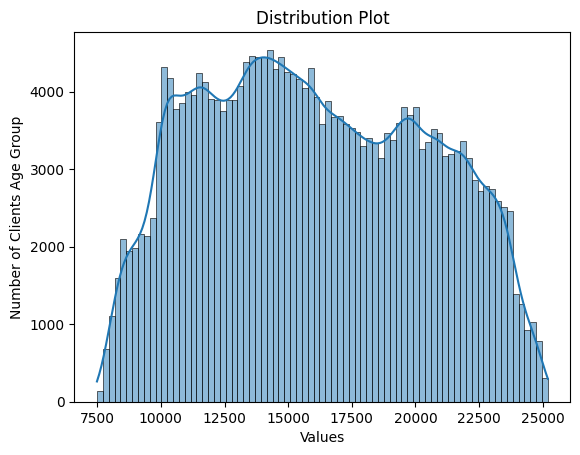

In [17]:
import seaborn as sns
# Plotting
fig, ax = plt.subplots()
sns.histplot(X_train['DAYS_BIRTH'], kde=True, ax=ax)

# Customize plot
ax.set_xlabel('Values')
ax.set_ylabel('Number of Clients Age Group')
ax.set_title('Distribution Plot')

# Display plot using streamlit
plt.show(fig)

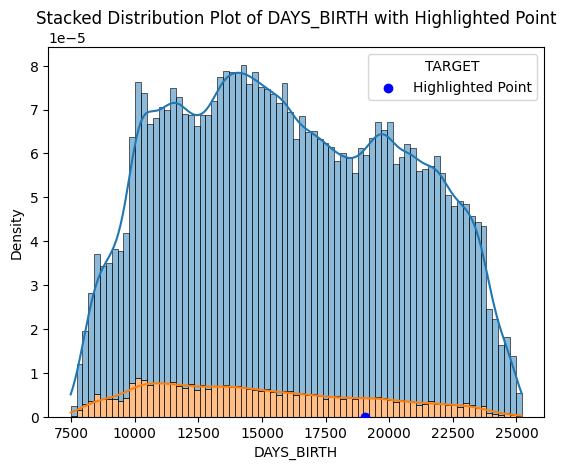

In [22]:
# Merge X_train and Y_train into a single DataFrame
data = pd.concat([X_train, Y_train], axis=1)

# Highlighted data point
highlighted_index = 2  # Index of the data point to highlight
highlighted_value = data.loc[highlighted_index, 'DAYS_BIRTH']

# Plotting
fig, ax = plt.subplots()
sns.histplot(data=data, x='DAYS_BIRTH', hue='TARGET', kde=True, stat='density', multiple='stack', ax=ax)

# Highlight one specific data point
if Y_train.loc[highlighted_index, 'TARGET'] == 1:
    ax.scatter(highlighted_value, 0, color='red', label='Highlighted Point', zorder=5)
elif Y_train.loc[highlighted_index, 'TARGET'] == 0:
    ax.scatter(highlighted_value, 0, color='blue', label='Highlighted Point', zorder=5)

# Customize plot
ax.set_xlabel('DAYS_BIRTH')
ax.set_ylabel('Density')
ax.set_title('Stacked Distribution Plot of DAYS_BIRTH with Highlighted Point')
ax.legend(title='TARGET')


# Display plot using Streamlit
#st.pyplot(fig)
plt.show(fig)

/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


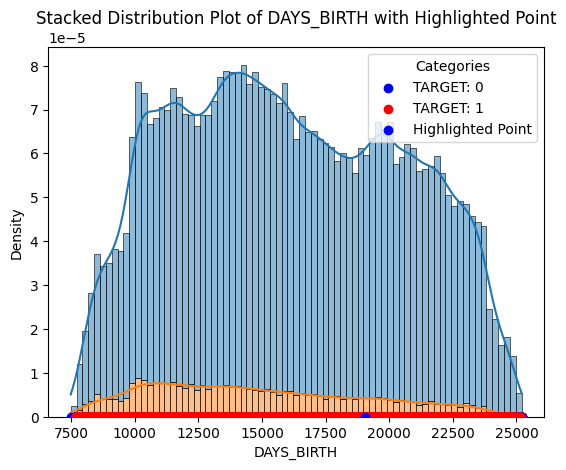

In [23]:
# Merge X_train and Y_train into a single DataFrame
data = pd.concat([X_train, Y_train], axis=1)

# Highlighted data point
highlighted_index = 2  # Index of the data point to highlight
highlighted_value = data.loc[highlighted_index, 'DAYS_BIRTH']

# Plotting
fig, ax = plt.subplots()
sns.histplot(data=data, x='DAYS_BIRTH', hue='TARGET', kde=True, stat='density', multiple='stack', ax=ax)

# Scatter plot for each category
for target_value, color in zip([0, 1], ['blue', 'red']):
    target_data = data[data['TARGET'] == target_value]
    ax.scatter(target_data['DAYS_BIRTH'], np.zeros_like(target_data['DAYS_BIRTH']), color=color, label=f'TARGET: {target_value}', zorder=5)

# Highlight the specific data point
highlighted_target = Y_train.loc[highlighted_index, 'TARGET']
highlighted_color = 'red' if highlighted_target == 1 else 'blue'
ax.scatter(highlighted_value, 0, color=highlighted_color, label='Highlighted Point', zorder=5)

# Customize plot
ax.set_xlabel('DAYS_BIRTH')
ax.set_ylabel('Density')
ax.set_title('Stacked Distribution Plot of DAYS_BIRTH with Highlighted Point')

# Display legend
ax.legend(title='Categories')

# Display plot
plt.show(fig)